### Importing the packages

In [887]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection as fs
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor

In [801]:
# reading the data from the csv file.

data = pd.read_csv('s3://ml-assignment2-data/UCI-electricity/UCI_data.csv')

In [889]:
data.shape

(19735, 28)

### Attribute Information:

date time year-month-day hour:minute:second 

T1, Temperature in kitchen area, in Celsius 

RH_1, Humidity in kitchen area, in % 

T2, Temperature in living room area, in Celsius 

RH_2, Humidity in living room area, in % 

T3, Temperature in laundry room area 

RH_3, Humidity in laundry room area, in % 

T4, Temperature in office room, in Celsius 

RH_4, Humidity in office room, in % 

T5, Temperature in bathroom, in Celsius 

RH_5, Humidity in bathroom, in % 

T6, Temperature outside the building (north side), in Celsius 

RH_6, Humidity outside the building (north side), in % 

T7, Temperature in ironing room , in Celsius 

RH_7, Humidity in ironing room, in % 

T8, Temperature in teenager room 2, in Celsius 

RH_8, Humidity in teenager room 2, in % 

T9, Temperature in parents room, in Celsius 

RH_9, Humidity in parents room, in % 

To, Temperature outside (from Chievres weather station), in Celsius 

Pressure (from Chievres weather station), in mm Hg 

RH_out, Humidity outside (from Chievres weather station), in % 

Wind speed (from Chievres weather station), in m/s 

Visibility (from Chievres weather station), in km 

Tdewpoint (from Chievres weather station), Â°C 

rv1, Random variable 1, nondimensional 

rv2, Random variable 2, nondimensional 

TARGET_Energy, energy use of Appliances and light fixtures in the house in Wh 

In [802]:
#Checking the descriptive statistics of the dataset.

data.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,101.496833
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,104.380829
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,10.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,50.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,60.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,100.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,1110.000000


## Converting the date datatype to datetime dataframe

##### -  separating the date into day, month, year
##### -  separting the time into hours and minutes
##### -  converting the days ---> weeks
##### -  converting the time into morning, afternoon, evening and night

In [803]:
data['date'] = pd.to_datetime(data['date'])

In [804]:
# Add columns like year, month, week, day, day, hour, and minute

data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['week'] = data['date'].dt.week
data['Day'] = data['date'].dt.day
data['Hour'] = data['date'].dt.hour
data['Minute'] = data['date'].dt.minute

In [805]:
#Re-arranging the date and time column in ascending order.

data = data.sort_values(by=['date'])

In [806]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [807]:
data['session'] = data['Hour'].apply(f)

In [808]:
data = data[['date','Year','Month','Day','Hour','Minute','session' ,'week', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'TARGET_energy']]

In [809]:
data.head()

,date,Year,Month,Day,Hour,Minute,session,week,T1,RH_1,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
18486,2016-01-11 17:00:00,2016,1,11,17,0,Evening,2,19.89,47.596667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90
7445,2016-01-11 17:10:00,2016,1,11,17,10,Evening,2,19.89,46.693333,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90
14757,2016-01-11 17:20:00,2016,1,11,17,20,Evening,2,19.89,46.300000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80
11475,2016-01-11 17:30:00,2016,1,11,17,30,Evening,2,19.89,46.066667,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,90
1718,2016-01-11 17:40:00,2016,1,11,17,40,Evening,2,19.89,46.333333,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,100


## Splitting the Features and Target Variable

In [810]:
features = data.drop(['date','TARGET_energy'], axis=1)
target = data.iloc[:,-1]

In [811]:
features.head()

,Year,Month,Day,Hour,Minute,session,week,T1,RH_1,T2,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
18486,2016,1,11,17,0,Evening,2,19.89,47.596667,19.2,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
7445,2016,1,11,17,10,Evening,2,19.89,46.693333,19.2,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
14757,2016,1,11,17,20,Evening,2,19.89,46.300000,19.2,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
11475,2016,1,11,17,30,Evening,2,19.89,46.066667,19.2,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
1718,2016,1,11,17,40,Evening,2,19.89,46.333333,19.2,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [812]:
target.head()

18486     90
7445      90
14757     80
11475     90
1718     100
Name: TARGET_energy, dtype: int64

In [813]:
features.shape

(19735, 33)

In [814]:
target.shape

(19735,)

## Encoding Categorical value to numerical value

In [815]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
features['session'] = LE.fit_transform(features['session'])

In [816]:
features.head(3)

,Year,Month,Day,Hour,Minute,session,week,T1,RH_1,T2,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
18486,2016,1,11,17,0,1,2,19.89,47.596667,19.2,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
7445,2016,1,11,17,10,1,2,19.89,46.693333,19.2,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
14757,2016,1,11,17,20,1,2,19.89,46.300000,19.2,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


## Visualizing Data for checking Outliers, distributions and correlations between variables

<Figure size 432x288 with 0 Axes>

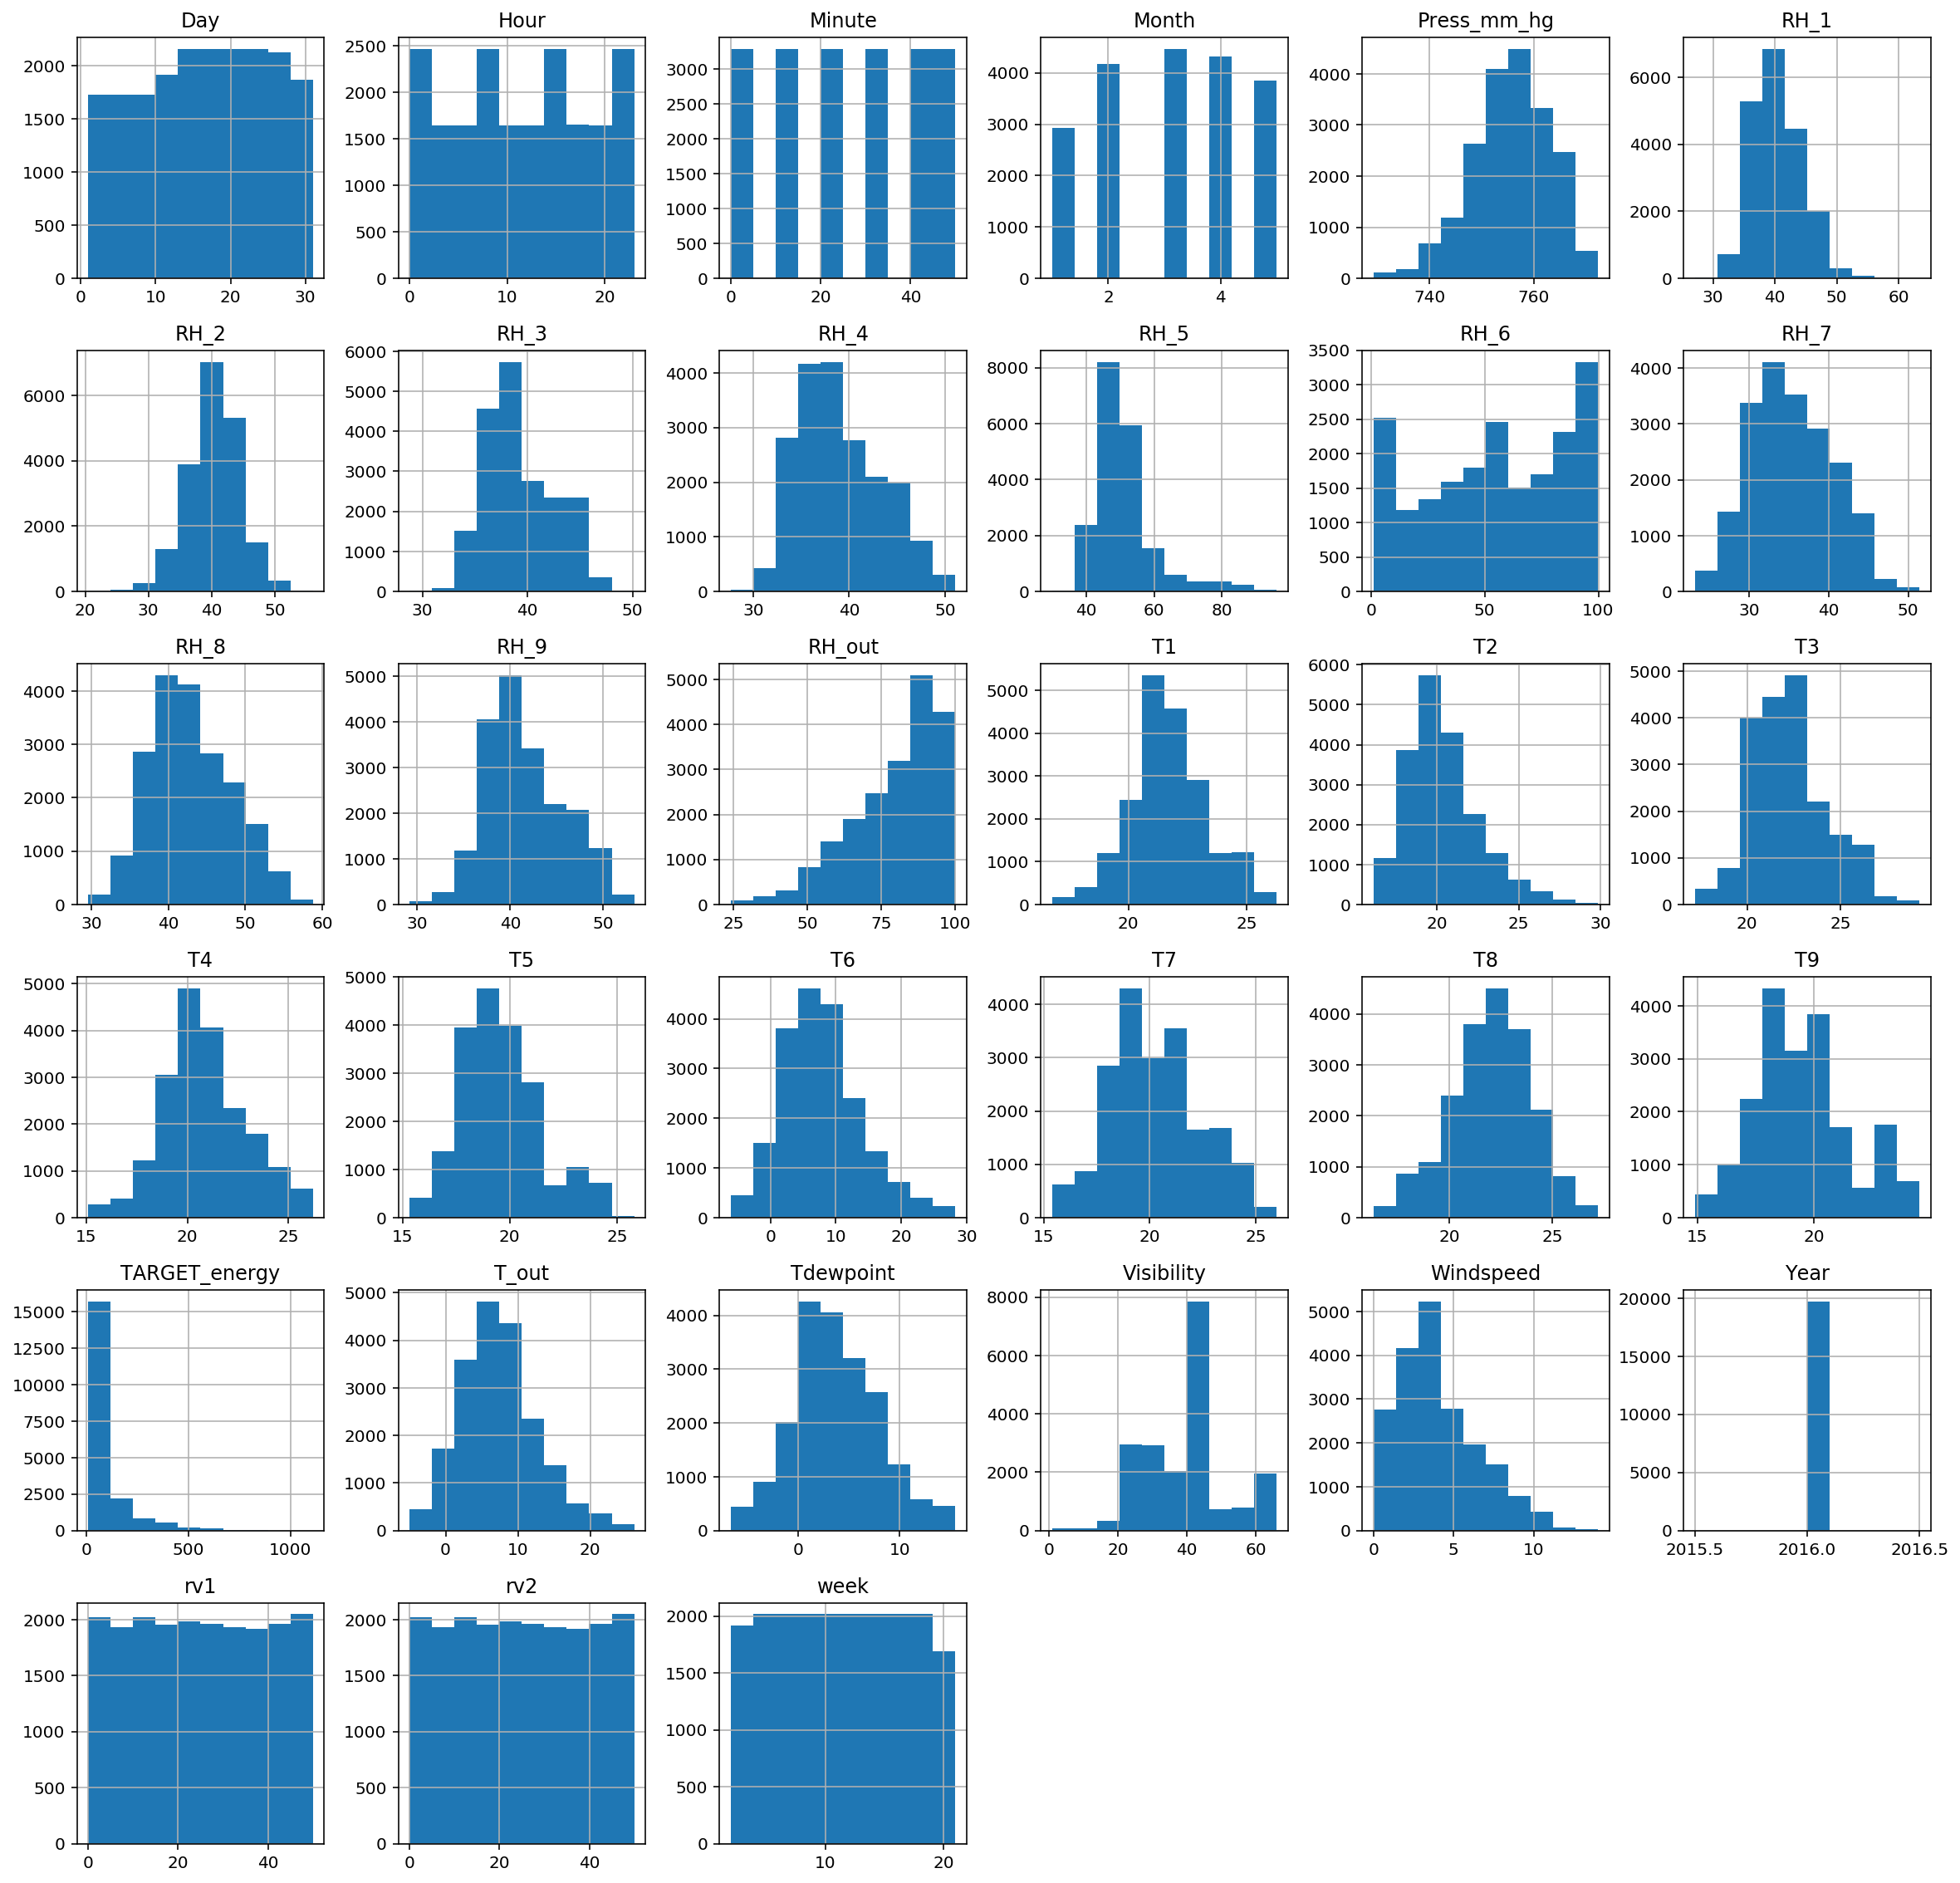

In [817]:
#checking the distribution of data using histogram

plt.figure()
data.hist(figsize=(20,20))
plt.show()

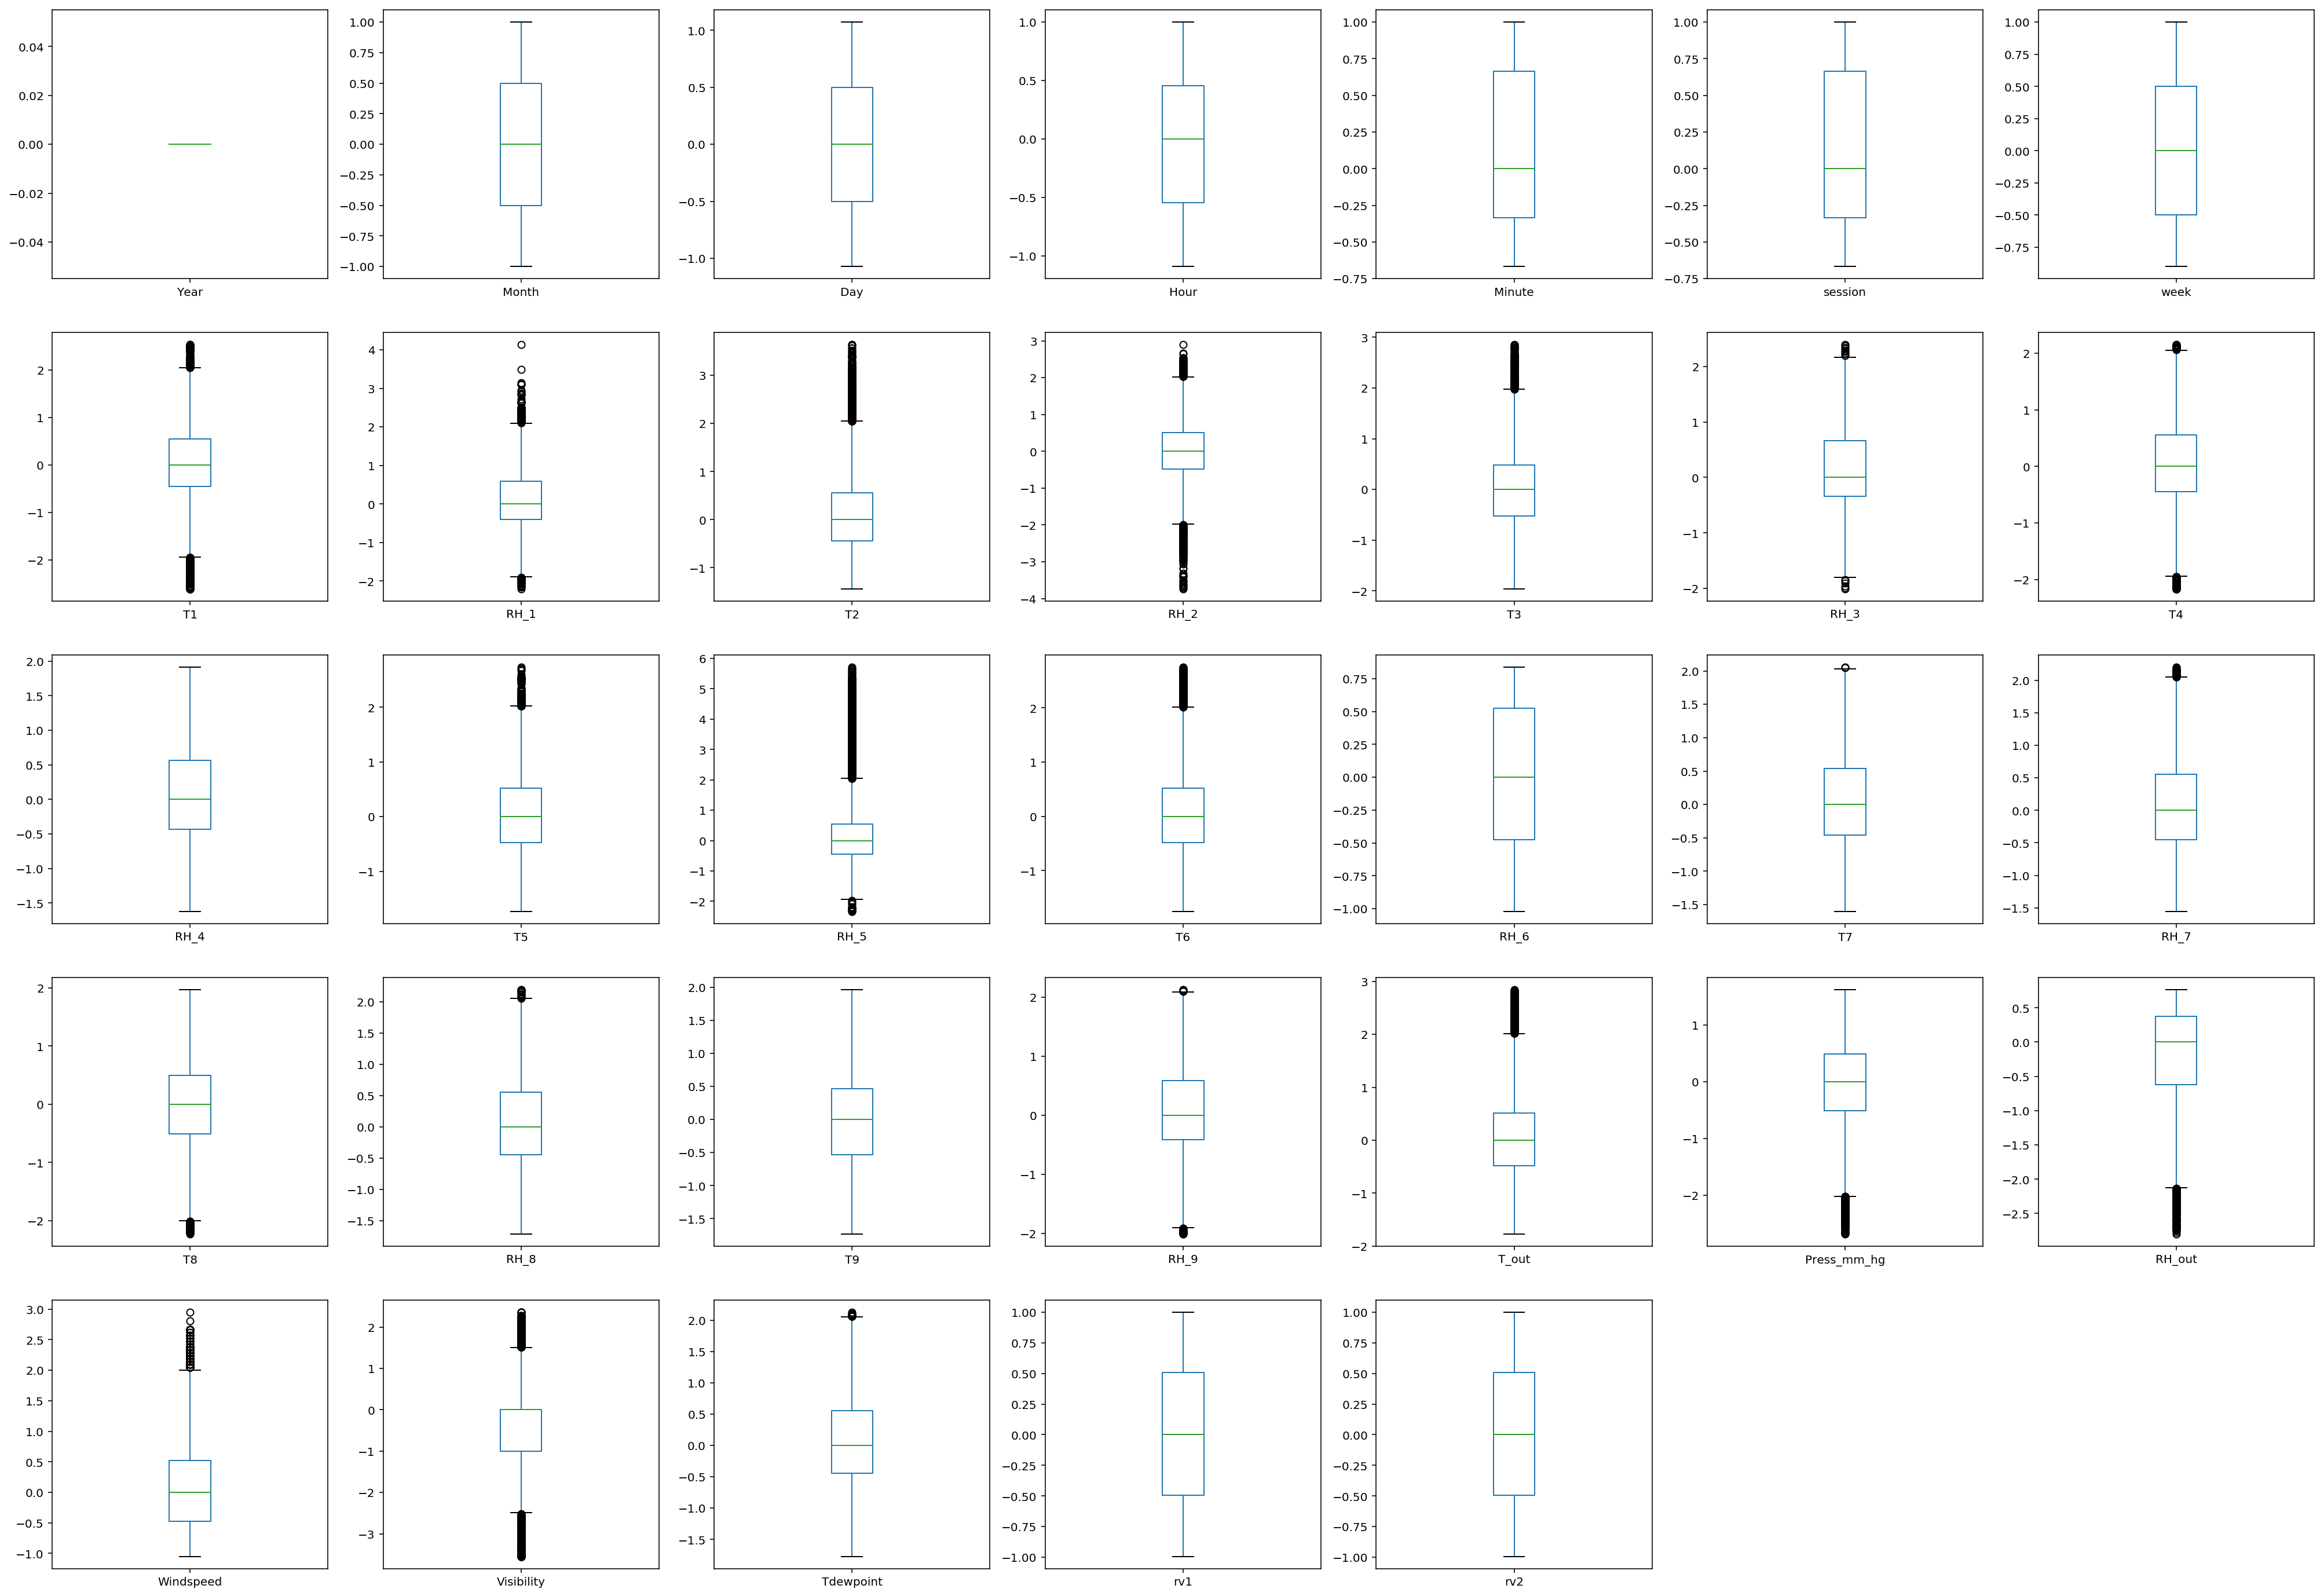

In [665]:
# BoxPlot to check the outlier 

features.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False, figsize=(35,35))
plt.show()

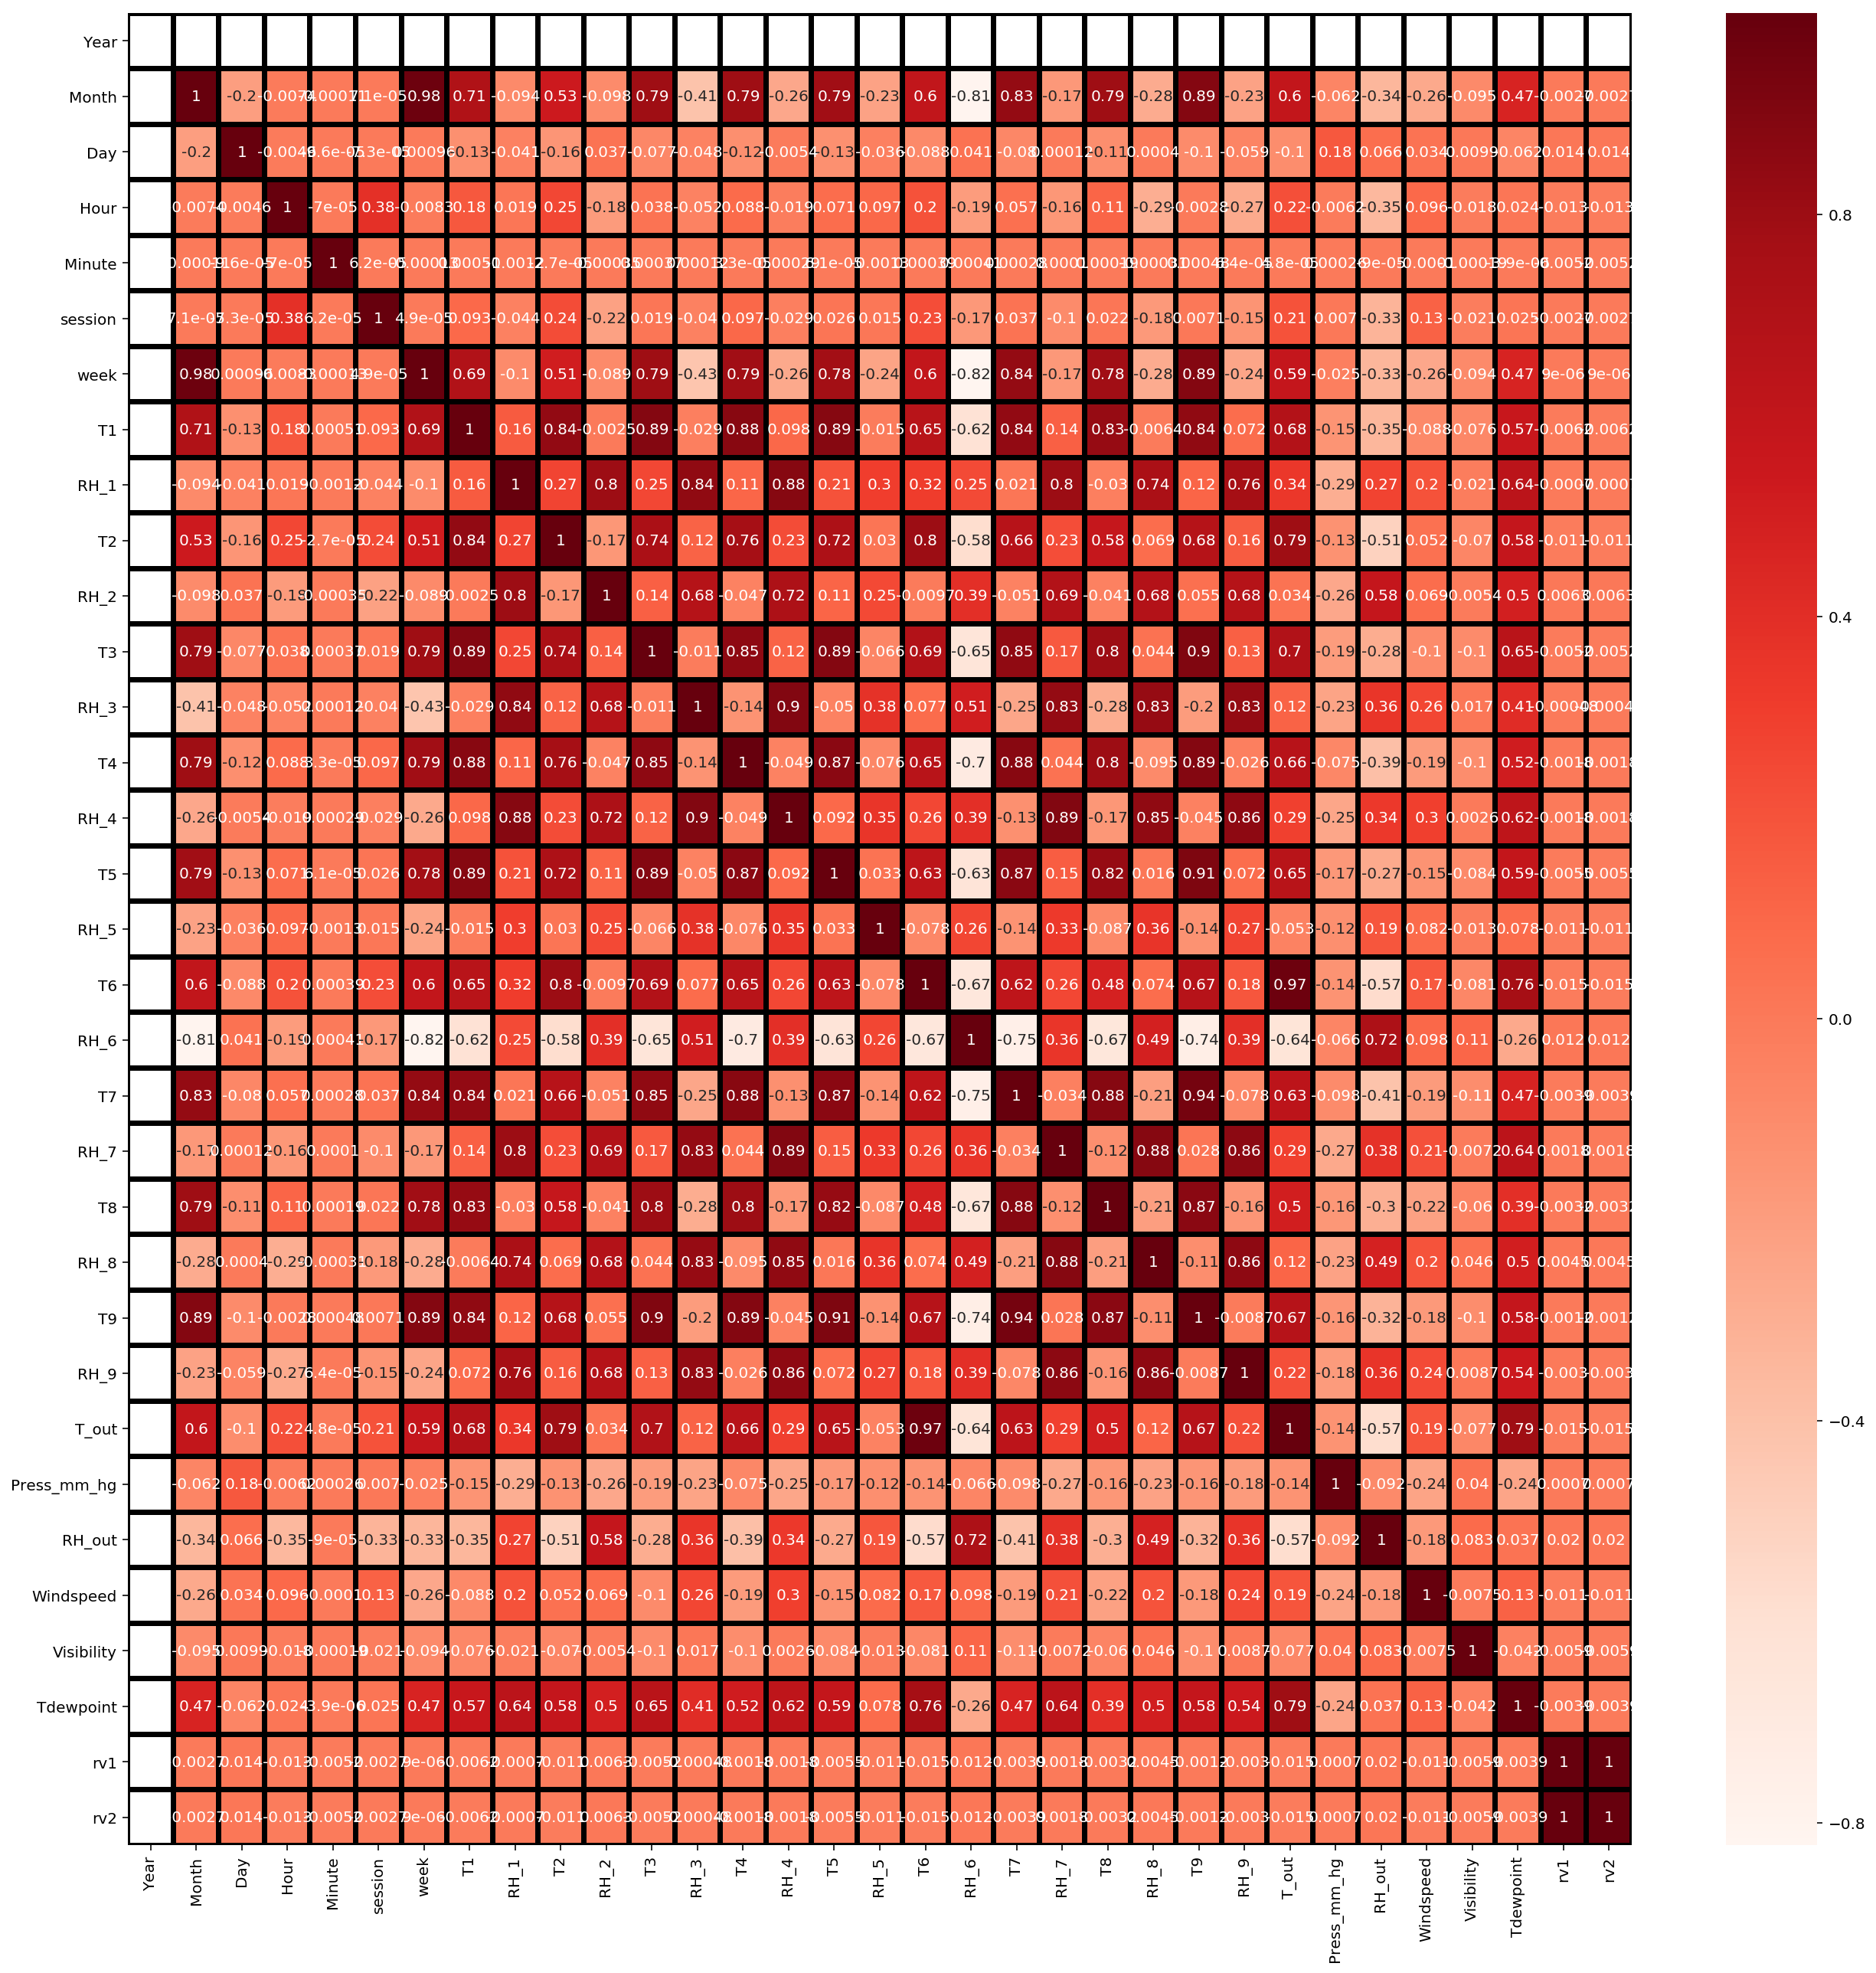

In [891]:
# #Correlation matrix

plt.figure(figsize = (22,22))
cor = features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=3, linecolor='black')
plt.show()

In [618]:
#Correlation between Features and Target Variable

data[data.columns[1:]].corr()['TARGET_energy'][:]

Year                  NaN
Month           -0.025043
Day             -0.000861
Hour             0.232351
Minute           0.012727
week            -0.025332
T1               0.052673
RH_1             0.092634
T2               0.117511
RH_2            -0.055513
T3               0.076143
RH_3             0.045618
T4               0.038891
RH_4             0.025402
T5               0.013422
RH_5             0.017569
T6               0.109538
RH_6            -0.070009
T7               0.015052
RH_7            -0.051987
T8               0.033436
RH_8            -0.091385
T9              -0.002149
RH_9            -0.051213
T_out            0.091733
Press_mm_hg     -0.035069
RH_out          -0.144363
Windspeed        0.090156
Visibility       0.001750
Tdewpoint        0.012318
rv1             -0.010907
rv2             -0.010907
TARGET_energy    1.000000
Name: TARGET_energy, dtype: float64

### Feature Scaling

In [818]:
#Making data scaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_scaled_features = scaler.fit_transform(features)
#robust_scaled_target = scaler.fit(target)

In [819]:
features = pd.DataFrame(robust_scaled_features, columns=features.columns)

### Feature Selection

In [820]:
from sklearn.ensemble import RandomForestRegressor

num_features = 10
model_rfi = RandomForestRegressor(n_estimators=100)
model_rfi.fit(robust_scaled_features, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = data.columns[fs_indices_rfi].values
best_features_rfi

array(['Day', 'T3', 'T_out', 'RH_2', 'T2', 'RH_7', 'T8', 'T1', 'T5', 'T9'],
      dtype=object)

In [821]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.15096511, 0.04957482, 0.0481518 , 0.04435586, 0.03762625,
       0.03486387, 0.03438238, 0.03437043, 0.03411464, 0.03245504])

### Divide the data in Sample features and Final features

In [823]:
# Samples Features

Feature_Samples = features[0:7000]
Target_Samples = target[0:7000]

In [824]:
# Final Features

Feature_Final = features[7001:]
Target_Final = target[7001:]

In [825]:
Feature_Samples = Feature_Samples[['Day', 'T3', 'T_out', 'RH_2', 'T5', 'T2', 'RH_7', 'T8', 'T9', 'T1']]

In [826]:
Feature_Final = Feature_Final[['Day', 'T3', 'T_out', 'RH_2', 'T5', 'T2', 'RH_7', 'T8', 'T9', 'T1']]

In [827]:
# Splitting the data in test/train set

X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(Feature_Samples, Target_Samples, test_size=0.2)

## Regression Model Training for sample data

### Linear Regression

In [828]:
bolm = LinearRegression()
lm.fit(X_train_sample,y_train_sample)
pred_test = lm.predict(X_test_sample)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

The model performance for testing set
--------------------------------------
Mean Absolute Error :  69.69353760804911
MSE score is 14244.177555602693
RMSE is 119.34897383556631
R2 score is 0.05026985048796373
Adjusted R2 score is 0.04429563135911374


### Polynomial Regression

In [829]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2, include_bias=True)
polyTrainX = polyFeat.fit_transform(X_train_sample)
polyTestX = polyFeat.fit_transform(X_test_sample)
lm.fit(polyTrainX, y_train_sample)
pred_test = lm.predict(polyTestX)

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

The model performance for testing set
--------------------------------------
Mean Absolute Error :  63.09311587703777
MSE score is 12553.113225601177
RMSE is 112.04067665629826
R2 score is 0.163021518507933
Adjusted R2 score is 0.1577565568163043


### Ridge Regression

In [830]:
rd = Ridge()
rd.fit(X_train_sample,y_train_sample)
pred_test = rd.predict(X_test_sample)

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

The model performance for testing set
--------------------------------------
Mean Absolute Error :  69.68351210919896
MSE score is 14244.75074522917
RMSE is 119.35137512919225
R2 score is 0.05023163308527212
Adjusted R2 score is 0.0442571735521996


### Lasso Regression

In [831]:
ls = Lasso()
ls.fit(X_train_sample,y_train_sample)
pred_test = ls.predict(X_test_sample)

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

The model performance for testing set
--------------------------------------
Mean Absolute Error :  70.86790061602383
MSE score is 14499.75345601977
RMSE is 120.41492206541417
R2 score is 0.033229334307420144
Adjusted R2 score is 0.027147922858958506


### Decision Tree Regressor

In [832]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_sample,y_train_sample)
pred_test = dtr.predict(X_test_sample)

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

The model performance for testing set
--------------------------------------
Mean Absolute Error :  40.00714285714286
MSE score is 8565.357142857143
RMSE is 92.54921470686362
R2 score is 0.42890504641947313
Adjusted R2 score is 0.4253126087172232


### Gradient Boosting Regressor

In [833]:
gd = GradientBoostingRegressor()
gd.fit(X_train_sample,y_train_sample)
pred_test = gd.predict(X_test_sample)

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

The model performance for testing set
--------------------------------------
Mean Absolute Error :  59.0599146706035
MSE score is 11224.165074592293
RMSE is 105.94416017219775
R2 score is 0.25162910018294316
Adjusted R2 score is 0.24692151903743687


### Support Vector Machine Regressor

In [834]:
svr =  SVR()
svr.fit(X_train_sample,y_train_sample)
pred_test = svr.predict(X_test_sample)

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The model performance for testing set
--------------------------------------
Mean Absolute Error :  57.79173220192557
MSE score is 16215.51598140981
RMSE is 127.34015855734518
R2 score is -0.08116908521557242
Adjusted R2 score is -0.08797011289036494


### Random Forest Regressor

In [835]:
rf = RandomForestRegressor()
rf_model = rf.fit(X_train_sample,y_train_sample)
pred_test = rf_model.predict(X_test_sample)

rmse = (np.sqrt(mean_squared_error(y_test_sample, pred_test)))
r2 = r2_score(y_test_sample, pred_test)
mse = mean_squared_error(y_test_sample, pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test_sample,pred_test))
print('MSE score is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('Adjusted R2 score is {}'.format(1 - (1-r2)*(len(y_train_sample)-1)/(len(y_train_sample)-data.shape[1]-1)))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The model performance for testing set
--------------------------------------
Mean Absolute Error :  38.90357142857143
MSE score is 6771.829285714286
RMSE is 82.29112519411973
R2 score is 0.5484884673133175
Adjusted R2 score is 0.5456482617698175


### Split the Data in different in different train, test and validation sets

In [836]:
# ## Dividing the data in "train" and "pretrain" sets
# X_train, X_pretrain, y_train, y_pretrain = train_test_split(features, target, test_size=0.2)
# print('X_train :',X_train.shape)
# print('X_pretrain :',X_pretrain.shape)

## Dividing the training and testing

In [837]:
X_train_final_feature, X_test_final_feature, y_train_final_feature, y_test_final_feature = train_test_split(Feature_Final, Target_Final, test_size=0.2)

X_train_final_feature = X_train_final_feature.values
X_test_final_feature = X_test_final_feature.values
y_train_final_feature = y_train_final_feature.values
y_test_final_feature = y_test_final_feature.values

In [838]:
from sklearn.model_selection import KFold, GridSearchCV

cv_method = KFold(n_splits=5, random_state=999)

In [839]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

### Random Forest Regressor with K-Fold

In [877]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipe_RFR = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('RFR', RandomForestRegressor(random_state=111))])

params_pipe_RFR = {'rfi_fs__n_features_': [10, 15, 20],
                   'RFR__max_depth': [5, 8, 10, 15, 17, 20],
                   'RFR__min_samples_split': [20, 50, 70],
                  }

gs_pipe_RFR = GridSearchCV(estimator=pipe_RFR, 
                           param_grid=params_pipe_RFR, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='neg_mean_absolute_error',
                           verbose=1) 

In [878]:
gs_pipe_RFR.fit(X_train_final_feature, y_train_final_feature)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will chan

GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)), ('RFR', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=111, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'rfi_fs__n_features_': [10, 15, 20], 'RFR__max_depth': [5, 8, 10, 15, 17, 20], 'RFR__min_samples_split': [20, 50, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [879]:
gs_pipe_RFR.best_params_

{'RFR__max_depth': 20, 'RFR__min_samples_split': 20, 'rfi_fs__n_features_': 10}

In [880]:
gs_pipe_RFR.best_score_

-37.86543799354674

### Gradient Boosting Regressor with K-Fold validation

In [779]:
from sklearn.pipeline import Pipeline

pipe_GBR = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('GBR', GradientBoostingRegressor())])

params_pipe_GBR = {
                   'GBR__max_depth':[5, 8, 10, 15, 17, 20],
                  }

gs_pipe_GBR = GridSearchCV(estimator=pipe_GBR, 
                           param_grid=params_pipe_GBR, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='neg_mean_absolute_error',
                           verbose=1) 

In [780]:
gs_pipe_GBR.fit(X_train_final_feature, y_train_final_feature)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  30 out of  30 | elapsed:  6.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)), ('GBR', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_s...one, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'GBR__max_depth': [5, 8, 10, 15, 17, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [781]:
gs_pipe_GBR.best_params_

{'GBR__max_depth': 15}

In [782]:
gs_pipe_GBR.best_score_

-31.61972266370009

### Decision Tree Regressor with K-Fold validation

In [783]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

pipe_DTR = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('DTR', DecisionTreeRegressor())])

params_pipe_DTR = {
                   'DTR__max_depth': [5, 8, 10, 15, 17, 20],
                   'DTR__min_samples_split': [20, 50, 70]
                  }

gs_pipe_DTR = GridSearchCV(estimator=pipe_DTR, 
                           param_grid=params_pipe_DTR, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='neg_mean_absolute_error',
                           verbose=1) 

In [784]:
gs_pipe_DTR.fit(X_train_final_feature, y_train_final_feature)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  5.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=999, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=10)), ('DTR', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'DTR__max_depth': [5, 8, 10, 15, 17, 20], 'DTR__min_samples_split': [20, 50, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [785]:
gs_pipe_DTR.best_params_

{'DTR__max_depth': 20, 'DTR__min_samples_split': 20}

In [786]:
gs_pipe_DTR.best_score_

-40.300959057791346

### Polynomial Regression

In [856]:
mae = []
crossvalidation = KFold(n_splits=5, random_state=1, shuffle=False)

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(X_train_final_feature)
    model = lm.fit(X_current, y_train_final_feature)
    scores = cross_val_score(model, X_current, y_train_final_feature, scoring="neg_mean_absolute_error", cv=crossvalidation,
 n_jobs=1)
    mae.append(np.mean(scores))
print(sorted(mae)[-1])

-46.651576046017695


In [ ]:
X_train_final_feature = X_train_final_feature.values
X_test_final_feature = X_test_final_feature.values
y_train_final_feature = y_train_final_feature.values
y_test_final_feature = y_test_final_feature.values

In [ ]:
### Final two models based on the lowest MAE in validation set.

### Random Forest Regressor on Test Dataset

In [890]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = KFold(n_splits=10, random_state=111)

cv_results_RFR = cross_val_score(estimator=gs_pipe_RFR.best_estimator_,
                                 X=X_test_final_feature,
                                 y=y_test_final_feature, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='neg_mean_absolute_error',
                                 )
cv_results_RFR.mean()

-43.77124727027137

### Gradient boosting regressor on Test Dataset

In [863]:
from sklearn.model_selection import cross_val_score

cv_method_ttest = KFold(n_splits=10, random_state=111)

cv_results_GBR = cross_val_score(estimator=gs_pipe_GBR.best_estimator_,
                                 X=X_test_final_feature,
                                 y=y_test_final_feature, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='neg_mean_absolute_error')
cv_results_GBR.mean()

-42.921798223230795

----------------END-------------------